In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('data/test/오존.csv')
df1 = pd.read_csv('data/test/평균기온.csv')
df2 = pd.read_csv('data/test/평균최고기온.csv')
df3 = pd.read_csv('data/test/평균최저기온.csv')
df4 = pd.read_csv('data/test/평균증기압.csv')

In [3]:
# df와 df1을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(df, df1, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [4]:
# result_df와 df2을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df2, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [5]:
# result_df와 df3을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df3, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [6]:
# result_df와 df4을 'STD_YYYYMM'과 'SIDO' 열을 기준으로 병합 (inner join)
result_df = pd.merge(result_df, df4, on=['STD_YYYYMM', 'SIDO'], how='inner')

In [7]:
result_df.head(2)

,SIDO,STD_YYYYMM,AVG_오존,오존0.06_BAD,오존0.1_BAD,오존_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
0,서울특별시,201001,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
1,부산광역시,201001,0.021,N,N,N,3.0,7.7,-1.1,3.5


In [8]:
dd = result_df['STD_YYYYMM'].dtype

print(f"result_df['STD_YYYYMM'].dtype: {dd}")

result_df['STD_YYYYMM'].dtype: int64


In [9]:
# 그룹별로 NaN 값을 평균값으로 대체
result_df['AVG_오존'] = result_df.groupby(['SIDO', 'STD_YYYYMM'])['AVG_오존'].transform(lambda x: x.fillna(x.mean()))
# 필요한 경우, 여전히 NaN 값이 있는 경우에 대비해 전체 평균값으로 대체할 수도 있습니다
result_df['AVG_오존'] = result_df['AVG_오존'].fillna(result_df['AVG_오존'].mean())
result_df.isna().sum()

SIDO          0
STD_YYYYMM    0
AVG_오존        0
오존0.06_BAD    0
오존0.1_BAD     0
오존_BAD        0
평균기온          0
평균최고기온        0
평균최저기온        0
평균증기압         0
dtype: int64

In [10]:
result_df.tail()

,SIDO,STD_YYYYMM,AVG_오존,오존0.06_BAD,오존0.1_BAD,오존_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
2647,전라북도,202212,0.0230,N,N,N,-1.1,4.1,-5.7,4.0
2648,전라남도,202212,0.0248,N,N,N,2.1,6.6,-1.9,4.7
2649,경상북도,202212,0.0240,N,N,N,-1.1,4.1,-5.8,3.3
2650,경상남도,202212,0.0238,N,N,N,1.1,6.7,-3.7,3.7
2651,제주특별자치도,202212,0.0365,N,N,Y,6.8,9.8,4.0,6.6


In [11]:
# 'SIDO' 열에서 '서울특별시'인 행만 필터링
seoul_df = result_df[result_df['SIDO'] == '서울특별시']


In [12]:
# 'STD_YYYYMM'을 인덱스로 사용
seoul_df['STD_YYYYMM'] = pd.to_datetime(seoul_df['STD_YYYYMM'], format='%Y%m')
seoul_df = seoul_df.set_index('STD_YYYYMM')

C:\Users\human\AppData\Local\Temp\ipykernel_10904\1799982633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  seoul_df['STD_YYYYMM'] = pd.to_datetime(seoul_df['STD_YYYYMM'], format='%Y%m')


In [13]:
seoul_df.tail(2)

,SIDO,AVG_오존,오존0.06_BAD,오존0.1_BAD,오존_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,,
2022-11-01,서울특별시,0.018,N,N,N,10.0,15.4,5.6,8.2
2022-12-01,서울특별시,0.015,N,N,N,-2.8,1.7,-6.6,3.1


In [14]:
# 원래의 'SIDO' 열 삭제
seoul_df.drop('SIDO', axis=1, inplace=True)

In [15]:
seoul_df.head()

,AVG_오존,오존0.06_BAD,오존0.1_BAD,오존_BAD,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,,,,
2010-01-01,0.011,N,N,N,-4.5,-0.7,-8.1,3.1
2010-02-01,0.016,N,N,N,1.4,4.9,-1.7,4.5
2010-03-01,0.024,N,N,N,4.3,8.1,0.5,4.9
2010-04-01,0.026,N,N,N,9.5,14.0,5.6,6.5
2010-05-01,0.030,N,N,Y,17.2,22.0,13.0,11.9


In [16]:
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
seoul_df = seoul_df.loc[:, ~seoul_df.columns.str.contains('BAD')]


In [17]:
seoul_df.tail(10)

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,
2022-03-01,0.028,7.7,12.7,3.2,6.7
2022-04-01,0.043,14.8,20.6,10.0,9.2
2022-05-01,0.049,19.1,25.0,13.9,12.0
2022-06-01,0.036,23.3,27.5,19.8,20.9
2022-07-01,0.037,27.3,31.0,24.2,27.7
2022-08-01,0.030,25.7,28.9,23.1,26.6
2022-09-01,0.031,22.4,27.2,18.2,18.2
2022-10-01,0.023,14.6,19.7,10.3,11.6
2022-11-01,0.018,10.0,15.4,5.6,8.2


In [18]:
seoul_df.columns.value_counts()

AVG_오존    1
평균기온      1
평균최고기온    1
평균최저기온    1
평균증기압     1
Name: count, dtype: int64

In [19]:
seoul_df.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01', '2022-09-01', '2022-10-01',
               '2022-11-01', '2022-12-01'],
              dtype='datetime64[ns]', name='STD_YYYYMM', length=156, freq=None)

In [20]:
seoul_df

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
STD_YYYYMM,,,,,
2010-01-01,0.011,-4.5,-0.7,-8.1,3.1
2010-02-01,0.016,1.4,4.9,-1.7,4.5
2010-03-01,0.024,4.3,8.1,0.5,4.9
2010-04-01,0.026,9.5,14.0,5.6,6.5
2010-05-01,0.030,17.2,22.0,13.0,11.9
...,...,...,...,...,...
2022-08-01,0.030,25.7,28.9,23.1,26.6
2022-09-01,0.031,22.4,27.2,18.2,18.2
2022-10-01,0.023,14.6,19.7,10.3,11.6


In [ ]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# 예측된 데이터를 위한 날짜 인덱스 생성
predicted_dates = []
for date in seoul_df.index[:-1]:
    for i in range(5):  # 각 월별 데이터 포인트로부터 5일 간격으로 5개의 날짜 생성
        predicted_dates.append(date + DateOffset(days=i * 5))

# 날짜 인덱스를 최종 데이터프레임에 적용
predicted_df_5_days = pd.DataFrame(predicted_5_day_data, index=predicted_dates)

# 결과 확인
print(predicted_df_5_days.head())

In [23]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from pandas.tseries.offsets import DateOffset
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)  # DeprecationWarning을 숨김


def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]  # 입력 데이터
        X.append(a)
        Y.append(dataset[i + time_step, 0])  # 출력 데이터
    return np.array(X), np.array(Y)

def predict_5_days(model, initial_point, scaler, time_step=1):
    current_input = np.array(initial_point)
    predicted = []

    for _ in range(5):  # 5일 간격으로 5개의 데이터 포인트 생성
        # 모델을 사용한 예측
        current_input_reshaped = current_input.reshape((1, time_step, 1))
        predicted_value = model.predict(current_input_reshaped)

        # 예측값 저장 및 입력 업데이트
        predicted.append(predicted_value[0, 0])
        current_input = np.roll(current_input, -1)
        current_input[-1] = predicted_value[0,0]

    # 스케일 역변환
    predicted = np.array(predicted).reshape(-1, 1)
    return scaler.inverse_transform(predicted)

# 모델 학습 및 예측 함수
def train_predict_model(data, time_step=1):
    # 데이터 스케일링
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # 데이터셋 준비
    X, Y = create_dataset(scaled_data, time_step)

    # LSTM 모델 구성 및 학습
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, Y, epochs=100, batch_size=32, verbose=1)

    return model, scaler

# 각 컬럼별 모델 학습
column_models = {}
for column in ['AVG_오존', '평균기온', '평균최고기온', '평균최저기온', '평균증기압']:
    column_models[column] = train_predict_model(seoul_df[[column]], time_step=1)

# 예측 및 보간 작업
interpolated_data = []
for i in range(len(seoul_df) - 1):
    current_date = seoul_df.index[i]
    next_date = seoul_df.index[i + 1]
    interpolated_data.append(seoul_df.iloc[i].tolist())

    for column in seoul_df.columns:
        model, scaler = column_models[column]
        initial_point = seoul_df[[column]].iloc[i].values
        predictions = predict_5_days(model, initial_point, scaler, time_step=1)

        for j in range(5):
            new_date = current_date + DateOffset(days=(j + 1) * 5)
            if new_date < next_date:
                interpolated_row = predictions[j].tolist()
                interpolated_data.append(interpolated_row)

# 마지막 월별 데이터 포인트 추가
interpolated_data.append(seoul_df.iloc[-1].tolist())

# 통합된 데이터를 데이터프레임으로 변환
columns = seoul_df.columns
interpolated_df = pd.DataFrame(interpolated_data, columns=columns)

# 인덱스 생성
interpolated_index = []
for i in range(len(seoul_df) - 1):
    current_date = seoul_df.index[i]
    next_date = seoul_df.index[i + 1]
    interpolated_index.append(current_date)

    for j in range(5):
        new_date = current_date + DateOffset(days=(j + 1) * 5)
        if new_date < next_date:
            interpolated_index.append(new_date)

# 마지막 월별 데이터 포인트의 인덱스 추가
interpolated_index.append(seoul_df.index[-1])

# 데이터프레임에 인덱스 적용
interpolated_df.index = interpolated_index

# 결과 확인
print(interpolated_df.head(15))


Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1866
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1704
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1367
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1187
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1000
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0818
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0647
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0406
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0362
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0356
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

ValueError: Length mismatch: Expected axis has 4031 elements, new values have 931 elements

In [24]:
print("Length of the DataFrame:", len(interpolated_df))
print("Length of the Index List:", len(interpolated_index))

Length of the DataFrame: 4031
Length of the Index List: 931


In [ ]:
ㅇㅇㅇㅇㅇㅇㅇ

In [ ]:
predicted_df_5_days

,AVG_오존,평균기온,평균최고기온,평균최저기온,평균증기압
0,0.014244,-23.401091,-9.314886,-25.532774,65.645966
1,0.017309,-9.982008,-1.054433,-12.980239,53.267139
2,0.019351,-3.657992,3.610818,-6.834735,44.649158
3,0.020746,0.046397,6.608554,-3.168638,38.174202
4,0.021717,2.448783,8.680151,-0.758424,33.100132
...,...,...,...,...,...
770,0.014418,232.642395,288.279053,203.725189,102.375443
771,0.017424,206.035110,257.714478,211.906479,73.542740
772,0.019428,195.256134,248.133331,216.106903,58.298222
773,0.020800,190.053055,244.522537,218.139877,48.255417


In [ ]:
import pandas as pd
from pandas.tseries.offsets import DateOffset

# 예측된 데이터를 위한 날짜 인덱스 생성
predicted_dates = []
for date in seoul_df.index[:-1]:
    for i in range(5):  # 각 월별 데이터 포인트로부터 5일 간격으로 5개의 날짜 생성
        predicted_dates.append(date + DateOffset(days=i * 5))

# 날짜 인덱스를 최종 데이터프레임에 적용
predicted_df_5_days = pd.DataFrame(predicted_5_day_data, index=predicted_dates)

# 결과 확인
print(predicted_df_5_days.head())

              AVG_오존       평균기온    평균최고기온     평균최저기온      평균증기압
2010-01-01  0.014244 -23.401091 -9.314886 -25.532774  65.645966
2010-01-06  0.017309  -9.982008 -1.054433 -12.980239  53.267139
2010-01-11  0.019351  -3.657992  3.610818  -6.834735  44.649158
2010-01-16  0.020746   0.046397  6.608554  -3.168638  38.174202
2010-01-21  0.021717   2.448783  8.680151  -0.758424  33.100132


In [ ]:
from pandas.tseries.offsets import DateOffset

# 월별 데이터 포인트와 예측된 5일 간격 데이터를 통합
combined_data = []
predicted_dates = []
for i in range(len(seoul_df) - 1):
    # 원본 월별 데이터 포인트 추가
    current_date = seoul_df.index[i]
    combined_data.append(seoul_df.iloc[i].values)
    predicted_dates.append(current_date)

    # 해당 월별 데이터 포인트에 대한 5일 간격 예측값 삽입
    model, scaler = train_predict_model(seoul_df[[column]], time_step=1)
    initial_point = seoul_df[[column]].iloc[i].values
    predictions = predict_5_days(model, initial_point, scaler, time_step=1)
    
    for j in range(5):
        predicted_date = current_date + DateOffset(days=(j + 1) * 5)
        predicted_dates.append(predicted_date)
        combined_data.append(predictions[j])

# 마지막 월별 데이터 포인트 추가
combined_data.append(seoul_df.iloc[-1].values)
predicted_dates.append(seoul_df.index[-1])

# 통합된 데이터를 데이터프레임으로 변환
combined_df = pd.DataFrame(combined_data, index=predicted_dates, columns=seoul_df.columns)

# 결과 확인
print(combined_df.head(10))


Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1995
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1835
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1677
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1512
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1182
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1004
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0839
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0695
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0580
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0505
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0482
Epoch 13/100
5/5 [==============================] - 0s 4ms/st

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 29ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1931
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1761
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1594
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1407
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1211
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1033
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0852
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0697
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0580
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 5s 5ms/step - loss: 0.1953
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1783
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1619
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1448
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1276
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1097
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0929
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0774
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0637
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0524
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0452
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1954
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1799
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1644
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1484
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1311
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1135
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0960
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0794
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0657
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0549
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0469
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 60ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1998
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1828
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1496
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1328
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1147
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0814
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0667
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0541
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0456
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 23ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1966
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1796
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1633
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1464
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1291
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1114
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0935
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0770
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0635
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0536
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0484
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 4s 3ms/step - loss: 0.1938
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1772
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1603
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1427
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1237
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1053
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0879
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0718
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0589
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1963
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1806
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1635
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1470
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1302
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1136
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0958
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0788
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0644
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0553
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0492
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1986
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1837
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1691
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1533
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1373
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1210
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1034
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0860
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0725
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1952
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1799
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1636
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1476
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1296
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1116
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0934
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0776
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0619
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0523
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1952
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1807
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1660
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1515
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1355
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1174
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1005
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0694
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0569
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 66ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1985
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1820
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1663
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1493
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1322
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1147
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0979
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0808
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0654
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0567
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 26ms/step
Epoch 1/100
5/5 [==============================] - 4s 5ms/step - loss: 0.1958
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1792
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1617
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1444
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1261
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1079
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0898
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0744
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0608
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0517
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 23ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1989
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1826
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1675
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1512
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1348
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1182
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1014
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0842
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0713
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0583
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0510
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0476
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1969
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1790
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1620
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1446
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1267
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1080
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0904
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0746
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0604
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0522
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 20ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1966
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1821
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1677
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1512
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1364
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1198
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1034
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0863
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0719
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0591
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0520
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0474
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1973
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1801
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1632
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1455
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1273
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1092
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0917
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0750
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0616
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0529
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0479
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0463
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1953
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1790
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1620
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1449
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1271
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1093
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0929
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0756
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0617
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0467
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0460
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 4s 3ms/step - loss: 0.1959
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1799
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1622
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1459
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1275
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1092
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0910
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0752
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0623
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0533
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 20ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1971
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1817
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1656
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1502
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1327
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1150
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0970
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0802
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0668
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0561
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0482
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 17ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1962
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1783
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1607
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1431
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1251
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1065
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0884
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0589
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0478
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 5s 5ms/step - loss: 0.1970
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1801
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1636
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1461
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1283
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1112
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0784
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0643
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0541
Epoch 11/100
5/5 [==============================] - 0s 8ms/step - loss: 0.0486
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1974
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1828
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1683
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1377
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1205
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1029
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0858
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0698
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0588
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0511
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 28ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1993
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1832
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1687
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1531
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1368
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1200
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1047
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0868
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0728
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0612
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0519
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 25ms/step
Epoch 1/100
5/5 [==============================] - 4s 6ms/step - loss: 0.1992
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1831
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1668
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1501
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1330
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1158
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0814
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0661
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0563
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0490
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 20ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1959
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1795
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1626
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1453
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1276
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1094
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0923
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0762
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0621
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0521
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0461
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 24ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1964
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1780
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1602
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1428
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1246
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1065
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0897
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0729
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0593
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0513
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1976
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1793
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1613
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1433
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1239
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1043
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0869
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0703
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0572
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1969
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1776
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1607
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1434
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1256
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1076
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0903
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0732
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0516
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0465
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1920
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1752
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1589
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1401
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1224
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1044
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0881
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0706
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0592
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0501
Epoch 11/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0474
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0466
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 32ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1932
Epoch 2/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1771
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1600
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1429
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1246
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1059
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0878
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0716
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0586
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0478
Epoch 12/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0472
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 27ms/step
Epoch 1/100
5/5 [==============================] - 4s 5ms/step - loss: 0.1981
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1832
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1679
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1523
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1359
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1201
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1021
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0862
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0722
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0591
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0529
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0497
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1941
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 0.1756
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1570
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1388
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1203
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0994
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0834
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0545
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0477
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0455
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0453
Epoch 13

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1971
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1802
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1631
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1457
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1281
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1099
Epoch 7/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0922
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0757
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0621
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0515
Epoch 11/100
5/5 [==============================] - 0s 7ms/step - loss: 0.0465
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1999
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1840
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1680
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1521
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1352
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1179
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0997
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0818
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0670
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0555
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 23ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1949
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1785
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1617
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1441
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1261
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1082
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0901
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0743
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0590
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0518
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 17ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1941
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1759
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1575
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1392
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1202
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1021
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0839
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0680
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0564
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0464
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1958
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1783
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1609
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1427
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1234
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1049
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0868
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0592
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0469
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 3s 4ms/step - loss: 0.1970
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1803
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1644
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1483
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1301
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1138
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0964
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0811
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0660
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0561
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0519
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0488
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 19ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1966
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1793
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1624
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1453
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1268
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1090
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0905
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0749
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0621
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0533
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0500
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0481
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 3ms/step - loss: 0.1952
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1797
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1483
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1303
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1137
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0954
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0797
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0645
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0542
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0497
Epoch 12/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0479
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1976
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1803
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1639
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 0.1465
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1283
Epoch 6/100
5/5 [==============================] - 0s 12ms/step - loss: 0.1105
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0934
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0767
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0641
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0538
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0485
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0472
Epoch 13

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1975
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1805
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1637
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1458
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1277
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1096
Epoch 7/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0922
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0750
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0607
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0521
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0473
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.2020
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1848
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1691
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1535
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1366
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1189
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1023
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0853
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0699
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0588
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 18ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1956
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1784
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1604
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 0.1436
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1251
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1065
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0889
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0728
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0498
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0450
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 23ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1956
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1795
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1640
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1479
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1301
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1131
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0955
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0792
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0652
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0552
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0487
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 24ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1965
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1774
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1598
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1403
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1221
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1050
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0863
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0705
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0574
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0502
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0464
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 20ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1948
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1805
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1653
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1496
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1332
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1158
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0981
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0816
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0667
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0569
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0503
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0489
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1987
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1838
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1694
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1547
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1389
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1224
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1060
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0886
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0736
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0614
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0525
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0499
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 33ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1917
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1746
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1581
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1394
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1209
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1013
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0840
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0682
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0558
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0491
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0458
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 20ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1942
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1776
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1609
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1432
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1245
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1059
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0900
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0726
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0588
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0468
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0452
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1940
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1769
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1592
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1423
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1244
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1049
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0883
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0719
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0597
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0508
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0471
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1958
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1772
Epoch 3/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1604
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1422
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1250
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1068
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0891
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0724
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0585
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0509
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0463
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0454
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 25ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1967
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1797
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1618
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1442
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1254
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1076
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0898
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0743
Epoch 9/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0612
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0513
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0467
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0463
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 24ms/step
Epoch 1/100
5/5 [==============================] - 4s 5ms/step - loss: 0.1975
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1819
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1667
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1497
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1342
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1167
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1001
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0835
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0688
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0582
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0501
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0474
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 26ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1956
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1777
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1598
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1424
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 0.1249
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1060
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0895
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0729
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0612
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0532
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0486
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0470
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 31ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1991
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1827
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1667
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1503
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1345
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1168
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1007
Epoch 8/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0838
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0693
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0575
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0498
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0466
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 24ms/step
Epoch 1/100
5/5 [==============================] - 4s 4ms/step - loss: 0.1948
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1779
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1600
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1419
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1242
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1055
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0886
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0713
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0590
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 0.0502
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0455
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 21ms/step
Epoch 1/100
5/5 [==============================] - 4s 3ms/step - loss: 0.1995
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1830
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1661
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1498
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1322
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1156
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0987
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0820
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0673
Epoch 10/100
5/5 [==============================] - 0s 5ms/step - loss: 0.0566
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0506
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0481
Epoch 13/

C:\Users\human\AppData\Local\Temp\ipykernel_8188\2862593159.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  current_input[-1] = predicted_value


1/1 [==============================] - 0s 22ms/step
Epoch 1/100
5/5 [==============================] - 4s 5ms/step - loss: 0.1966
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1780
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1594
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1417
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1225
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1056
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0880
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0712
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0592
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 11/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0457
Epoch 12/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0449
Epoch 13/

KeyboardInterrupt: 

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [ ]:
# 데이터셋 준비 (이미 원-핫 인코딩 및 NaN 처리 완료)
data = predicted_df_5_days.values

# 데이터 정규화
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# 데이터셋 분할
n_train = int(0.8 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]
train_dates = predicted_df_5_days.index[:n_train]
test_dates = predicted_df_5_days.index[n_train:]

# 데이터셋 재구성
seq_len = 6  # 수치구성방법 총 데이터의수 20%가 최대치 (수치를 조정해서 모델 적중률 조정)
input_dim = train_data.shape[1]  # 입력 차원 (원-핫 인코딩된 열의 수)

trainX, trainY = [], []
testX, testY = [], []

for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])  # 첫 번째 열이 타겟 변수라고 가정

for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# LSTM 모델 구성
model = Sequential()
model.add(LSTM(128, input_shape=(seq_len, input_dim), return_sequences=True))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1))  # 하나의 출력 뉴런

# 모델 컴파일 및 학습
model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
model.fit(trainX, trainY, epochs=50, batch_size=15, validation_split=0.1, verbose=1)

# 예측 및 역변환
prediction = model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]



Epoch 1/50
37/37 [==============================] - 5s 29ms/step - loss: 0.2770 - val_loss: 0.0266
Epoch 2/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0338 - val_loss: 0.0072
Epoch 3/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0058 - val_loss: 0.0047
Epoch 4/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 5/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0031
Epoch 6/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0012
Epoch 7/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 8/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0018 - val_loss: 0.0026
Epoch 9/50
37/37 [==============================] - 0s 8ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 10/50
37/37 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 11/50
37/37 

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 1.2886439736473406e-08
Mean Absolute Error: 6.262591502319608e-05


In [ ]:
from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

R-squared (Coefficient of Determination): 0.998000122639091


In [ ]:
len(prediction_transformed), len(testY_transformed)

(149, 149)

In [ ]:
print(f'prediction_transformed: {len(prediction_transformed)}, testY_transformed: {len(testY_transformed)}')

prediction_transformed: 938, testY_transformed: 938


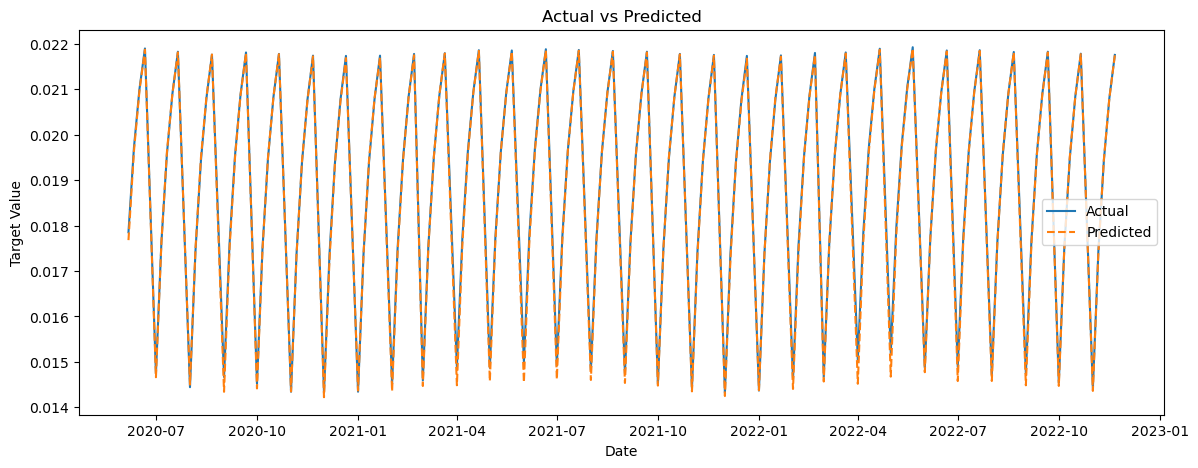

In [ ]:
# 실제값과 예측값의 날짜 배열을 조정
adjusted_test_dates = test_dates[len(test_dates) - len(testY_transformed):]

# 결과 시각화
plt.figure(figsize=(14, 5))
plt.plot(adjusted_test_dates, testY_transformed, label='Actual')
plt.plot(adjusted_test_dates, prediction_transformed, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Target Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()


그래프에 나타난 점이 중복되어 보이는 경우, 몇 가지 가능한 원인이 있을 수 있습니다:

데이터 중복: 같은 날짜에 대해 두 개 이상의 데이터 포인트가 있을 수 있습니다. 이것은 데이터셋 내의 중복된 행이나 데이터의 집계 방식에 오류가 있을 때 발생할 수 있습니다.

데이터 포인트의 겹침: 예측값과 실제값이 유사하여 그래프 상에서 겹쳐 보일 수 있습니다. 만약 실제값과 예측값이 거의 일치한다면, 두 선이 겹쳐져서 한 선처럼 보이지 않고, 별도의 점으로 나타날 수 있습니다.

시각화 코드: 시각화 코드가 같은 날짜에 대해 여러 점을 그리도록 구현되었을 수 있습니다. 예를 들어, plt.plot() 함수에 같은 날짜가 여러 번 나타날 경우 이런 현상이 발생할 수 있습니다.

데이터 전처리 오류: 데이터 전처리 과정에서 예측값이나 실제값 배열을 생성할 때 어떤 실수로 인해 데이터가 잘못된 위치에 할당되었을 수도 있습니다.

이 현상을 정확히 파악하려면 데이터와 시각화 코드를 자세히 검토할 필요가 있습니다. 일단 데이터프레임에 중복된 날짜가 있는지 확인하고, 이를 제거하는 것이 좋습니다. 중복을 확인하려면 다음과 같은 코드를 사용할 수 있습니다:

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# 현재 학습된 모델 저장
model.save('data/current_trained_model.h5')
# 저장된 모델 로드
pretrained_model = load_model('data/current_trained_model.h5')

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 날짜별로 데이터가 중복되었는지 확인
duplicates = result_df.index.duplicated()
print("Number of duplicates in the index: ", duplicates.sum())

Number of duplicates in the index:  0


In [ ]:
def predict_future_dynamic_seq_len(model, initial_seq, future_steps, initial_seq_len, input_dim, max_seq_len, step_size):
    current_seq = initial_seq.copy()
    future_predictions = []
    current_seq_len = initial_seq_len

    for step in range(future_steps):
        # 현재 시퀀스를 바탕으로 예측
        current_seq_reshaped = current_seq[-(current_seq_len*input_dim):].reshape(1, current_seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)[0, 0]

        # 예측 결과 저장
        future_predictions.append(next_prediction)

        # 새로운 예측값 추가
        new_seq = np.zeros((current_seq_len+1, input_dim))
        new_seq[:-1, :] = current_seq.reshape(current_seq_len, input_dim)
        new_seq[-1, 0] = next_prediction

        # 시퀀스 길이 조정
        if current_seq_len < max_seq_len:
            current_seq_len += 1
        elif current_seq_len == max_seq_len:
            current_seq_len = max_seq_len
        # 현재 시퀀스 업데이트
        current_seq = new_seq[-current_seq_len:].flatten()

    return future_predictions



# 함수 사용 예시
future_steps = 36
initial_seq_len = 6  # 초기 시퀀스 길이
max_seq_len = 300  # 최대 시퀀스 길이 설정

step_size = 1
latest_sequence = testX[-1]
future_predictions = predict_future_dynamic_seq_len(model, latest_sequence, future_steps, initial_seq_len, input_dim, max_seq_len, step_size)

# 이하 코드는 동일하게 역변환 및 시각화 수행

# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성 - 월의 시작일을 기준으로
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1, freq='MS')[1:]


plt.figure(figsize=(14, 5))
plt.plot(future_dates[:len(future_predictions_transformed)], future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()


ValueError: cannot reshape array of size 110 into shape (1,6,5)

1/1 [==============================] - ETA: 0s

1/1 [==============================] - 0s 22ms/step


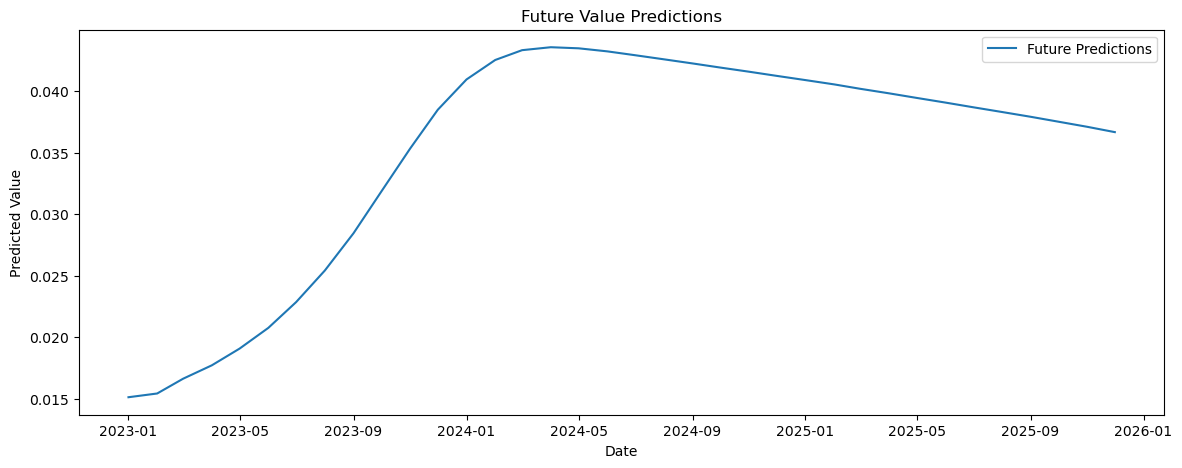

In [ ]:
# 지금 수정중인 코드
def predict_future_dynamic_seq_len(model, initial_seq, future_steps, initial_seq_len, max_seq_len, input_dim, step_size):
    current_seq = initial_seq.copy()
    future_predictions = []
    current_seq_len = initial_seq_len

    for step in range(future_steps):
        # 현재 시퀀스를 바탕으로 예측
        current_seq_reshaped = current_seq[-(current_seq_len*input_dim):].reshape(1, current_seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)[0, 0]

        # 예측 결과 저장
        future_predictions.append(next_prediction)

        # 다음 시퀀스 준비: 새로운 예측값 추가
        if current_seq_len < max_seq_len:
            new_seq = np.zeros((current_seq_len+1, input_dim))  # 시퀀스 길이 증가
            new_seq[:-1] = current_seq[-current_seq_len*input_dim:].reshape(current_seq_len, input_dim)
        else:
            new_seq = np.zeros((current_seq_len, input_dim))    # 시퀀스 길이 유지
            new_seq[:-1] = current_seq[-(current_seq_len-1)*input_dim:].reshape(current_seq_len-1, input_dim)

        new_seq[-1, 0] = next_prediction

        # 현재 시퀀스 업데이트 및 길이 조정
        current_seq = new_seq.flatten()
        current_seq_len = min(max_seq_len, current_seq_len + 1)


    return future_predictions

# 함수 사용 예시
future_steps = 36
initial_seq_len = 6  # 초기 시퀀스 길이
max_seq_len = 20    # 최대 시퀀스 길이 설정

step_size = 1
latest_sequence = testX[-1]
future_predictions = predict_future_dynamic_seq_len(model, latest_sequence, future_steps, initial_seq_len, max_seq_len, input_dim, step_size)
# 이하 코드는 동일하게 역변환 및 시각화 수행

# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성 - 월의 시작일을 기준으로
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1, freq='MS')[1:]


plt.figure(figsize=(14, 5))
plt.plot(future_dates[:len(future_predictions_transformed)], future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()



1/1 [==============================] - 0s 23ms/step


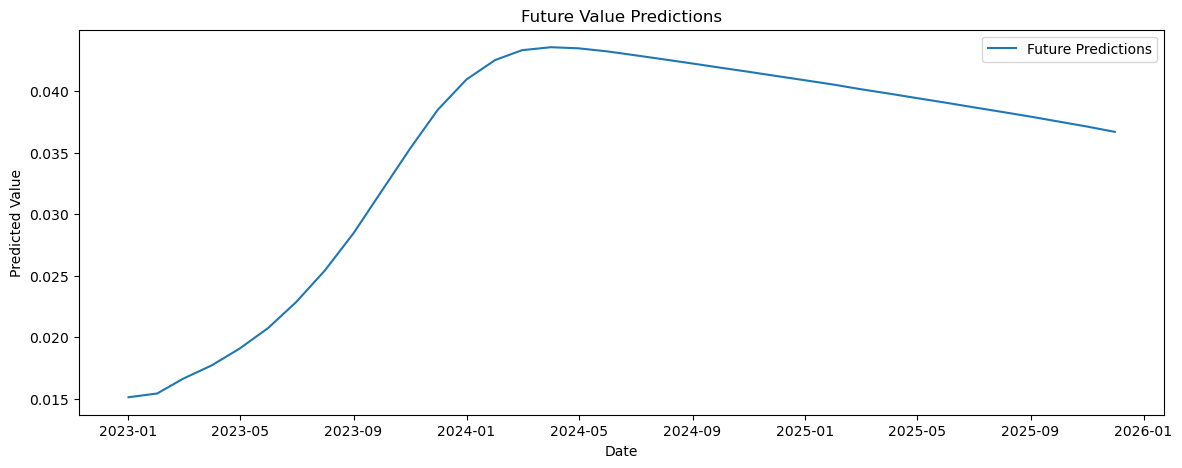

In [ ]:
def predict_future_dynamic_seq_len(model, initial_seq, future_steps, initial_seq_len, input_dim, step_size):
    current_seq = initial_seq.copy()
    future_predictions = []
    current_seq_len = initial_seq_len

    for step in range(future_steps):
        # 현재 시퀀스를 바탕으로 예측
        current_seq_reshaped = current_seq[-(current_seq_len*input_dim):].reshape(1, current_seq_len, input_dim)
        next_prediction = model.predict(current_seq_reshaped)[0, 0]

        # 예측 결과 저장
        future_predictions.append(next_prediction)

        # 다음 시퀀스 준비: 새로운 예측값 추가
        new_seq = np.zeros((current_seq_len+1, input_dim))
        new_seq[:-1] = current_seq[-current_seq_len*input_dim:].reshape(current_seq_len, input_dim)
        new_seq[-1, 0] = next_prediction

        # 현재 시퀀스 업데이트 및 길이 조정
        current_seq = new_seq[:max_seq_len].flatten()
        current_seq_len = min(max_seq_len, current_seq_len + 1)

    return future_predictions


# 함수 사용 예시
future_steps = 36
initial_seq_len = 6  # 초기 시퀀스 길이
max_seq_len = 300 # 최대 시퀀스 길이 설정

step_size = 1
latest_sequence = testX[-1]
future_predictions = predict_future_dynamic_seq_len(model, latest_sequence, future_steps, initial_seq_len, input_dim, step_size)

# 이하 코드는 동일하게 역변환 및 시각화 수행

# 예측된 값들을 원래 데이터셋과 동일한 차원으로 확장
extended_predictions = np.zeros((len(future_predictions), data_scaled.shape[1]))
extended_predictions[:, 0] = future_predictions

# 역변환을 통해 원래 스케일로 변환
future_predictions_transformed = scaler.inverse_transform(extended_predictions)[:, 0]

# 미래 날짜 생성 - 월의 시작일을 기준으로
future_dates = pd.date_range(start=test_dates[-1], periods=future_steps + 1, freq='MS')[1:]


plt.figure(figsize=(14, 5))
plt.plot(future_dates[:len(future_predictions_transformed)], future_predictions_transformed, label='Future Predictions')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.title('Future Value Predictions')
plt.legend()
plt.show()



In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
# 현재 학습된 모델 저장
model.save('data/current_trained_model.h5')
# 저장된 모델 로드
pretrained_model = load_model('data/current_trained_model.h5')

c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# 'SIDO' 열에서 '서울특별시'인 행만 필터링
incheon_df = result_df[result_df['SIDO'] == '인천광역시']

In [ ]:
# 'STD_YYYYMM'을 인덱스로 사용
incheon_df['STD_YYYYMM'] = pd.to_datetime(incheon_df['STD_YYYYMM'], format='%Y%m')
incheon_df = incheon_df.set_index('STD_YYYYMM')
# 원래의 'SIDO' 열 삭제
incheon_df.drop('SIDO', axis=1, inplace=True)
# 열 이름에 'BAD' 문자열을 포함하는 열을 찾아 삭제
incheon_df = incheon_df.loc[:, ~incheon_df.columns.str.contains('BAD')]


C:\Users\human\AppData\Local\Temp\ipykernel_8188\3462914305.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  incheon_df['STD_YYYYMM'] = pd.to_datetime(incheon_df['STD_YYYYMM'], format='%Y%m')


In [ ]:
incheon_df.isna().sum()

AVG_오존    0
평균기온      0
평균최고기온    0
평균최저기온    0
평균증기압     0
dtype: int64

In [ ]:

# 2단계: 모델 레이어 수정
# 예: 마지막 두 레이어를 제외한 나머지 레이어 동결
for layer in pretrained_model.layers[:-1]:
    layer.trainable = False

# 3단계: 새 데이터셋 준비
data = incheon_df.values
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

n_train = int(0.8 * len(data_scaled))
train_data = data_scaled[:n_train]
test_data = data_scaled[n_train:]

seq_len = 22
input_dim = train_data.shape[1]

trainX, trainY = [], []
for i in range(seq_len, len(train_data)):
    trainX.append(train_data[i-seq_len:i, :])
    trainY.append(train_data[i, 0])

testX, testY = [], []
for i in range(seq_len, len(test_data)):
    testX.append(test_data[i-seq_len:i, :])
    testY.append(test_data[i, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)



# 4단계: 모델 학습
pretrained_model.compile(optimizer=Adam(learning_rate=0.01), loss='mse')
pretrained_model.fit(trainX, trainY, epochs=70, batch_size=30, validation_split=0.1, verbose=1)

# 예측 및 결과 분석
prediction = pretrained_model.predict(testX)
prediction_transformed = scaler.inverse_transform(np.concatenate((prediction, np.zeros((prediction.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
testY_transformed = scaler.inverse_transform(np.concatenate((testY.reshape(-1,1), np.zeros((testY.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

# 결과 시각화 등


Epoch 1/70


ValueError: in user code:

    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1126, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\human\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 6, 5), found shape=(None, 22, 5)


In [ ]:

from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE 및 MAE 계산
mse = mean_squared_error(testY_transformed, prediction_transformed)
mae = mean_absolute_error(testY_transformed, prediction_transformed)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

from sklearn.metrics import r2_score

# R² 값 계산
r_squared = r2_score(testY_transformed, prediction_transformed)

print("R-squared (Coefficient of Determination):", r_squared)

Mean Squared Error: 4.407793169647097e-05
Mean Absolute Error: 0.0053484793402268655
R-squared (Coefficient of Determination): 0.3608188559096437


In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)

print("trainX shape:", trainX.shape)
print("trainY shape:", trainY.shape)
print("testX shape:", testX.shape)
print("testY shape:", testY.shape)


trainX shape: (9, 22, 5)
trainY shape: (9,)
testX shape: (103, 22, 5)
testY shape: (103,)
